In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing



In [2]:
# --- When to Use Log Transformation ---
# Log transformation is a powerful technique used to handle skewed data.
# Its primary purposes are:
# 1. To make the distribution of the data more symmetric or "normal".
#    This is a requirement for some statistical models and machine learning algorithms.
# 2. To reduce the impact of outliers, as it compresses the range of the data.
#
# --- Data Requirements ---
# The standard log(x) transformation can only be applied to data that is strictly positive (x > 0).
# The log(1+x) transformation (implemented as np.log1p) is particularly useful because it
# can handle data that includes zero (x >= 0), which is common in real-world datasets.




In [3]:
# 1. Load a sample dataset from scikit-learn
# We'll use the California Housing dataset, as some of its features are skewed.
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)





In [4]:
# 2. Select a feature to work with
# Let's inspect the distribution of the 'Population' feature.
# We expect it to be right-skewed (a long tail to the right).
feature_to_transform = 'Population'
print(f"Original data description for '{feature_to_transform}':")
print(df[feature_to_transform].describe())
print("\n")




Original data description for 'Population':
count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: Population, dtype: float64




In [5]:
# 3. Apply the Log Transformation log(1+x)
# We create a new column to store the transformed data.
# np.log1p(x) is numerically equivalent to np.log(1 + x) and is more precise for small values of x.
transformed_col_name = f'{feature_to_transform}_log1p'
df[transformed_col_name] = np.log1p(df[feature_to_transform])




Displaying before-and-after visualization...


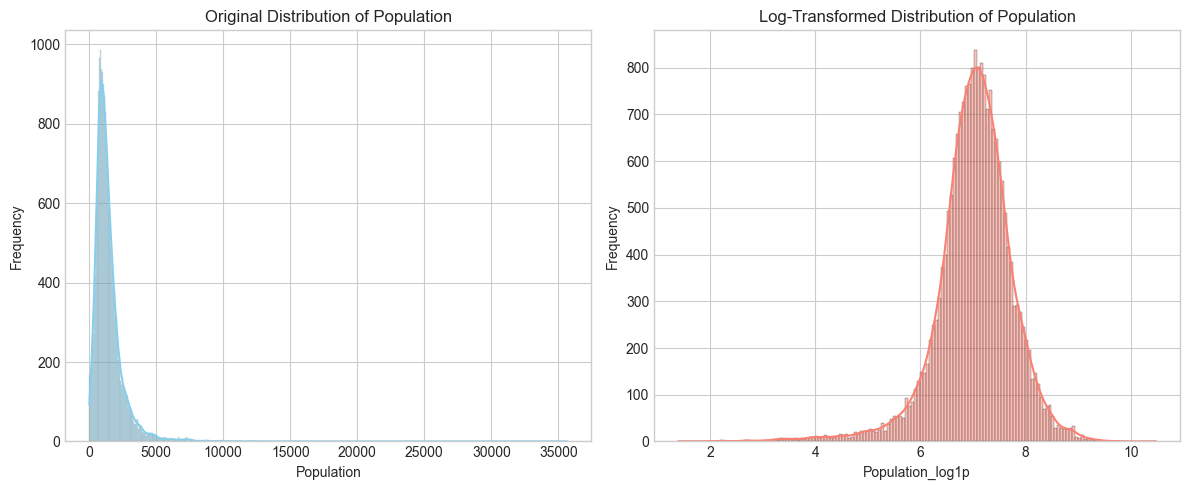


DataFrame head with the new log-transformed column:
   Population  Population_log1p
0       322.0          5.777652
1      2401.0          7.784057
2       496.0          6.208590
3       558.0          6.326149
4       565.0          6.338594


In [6]:
# 4. Show the result of applying the technique

# --- a) Before-and-After Visualization ---
# We'll create two histograms to visually compare the distribution of the data
# before and after the transformation.

print("Displaying before-and-after visualization...")
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot original data
sns.histplot(df[feature_to_transform], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title(f'Original Distribution of {feature_to_transform}')
axes[0].set_xlabel(feature_to_transform)
axes[0].set_ylabel('Frequency')

# Plot transformed data
sns.histplot(df[transformed_col_name], kde=True, ax=axes[1], color='salmon')
axes[1].set_title(f'Log-Transformed Distribution of {feature_to_transform}')
axes[1].set_xlabel(transformed_col_name)
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


# --- b) Print the head of the resulting DataFrame ---
# This shows the new column alongside the original data.
print("\nDataFrame head with the new log-transformed column:")
print(df[[feature_to_transform, transformed_col_name]].head())